## Preprocess train data and validation data ##

In [13]:
target_width = 224
target_height = 224
delta = 16

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import cv2
import math
from glob import glob
import os

import tensorflow as tf

master = pd.read_csv('input/train_labels.csv')
master.head()

name  invasive
0     1         0
1     2         0
2     3         1
3     4         0
4     5         1

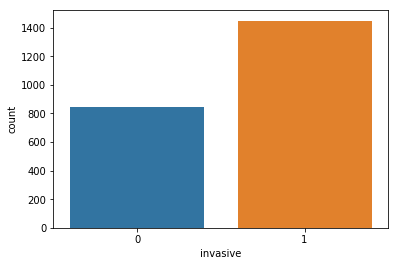

In [15]:
import seaborn as sns

sns.countplot(x='invasive', data=master)

In [16]:
master['invasive'].value_counts()

1    1448
0     847
Name: invasive, dtype: int64

# Collect training set

In [18]:
from preprocessing import preprocess

In [19]:
def collect_image_paths():
    img_path = 'input/train/'
    file_paths = []
    
    for i in range(len(master)):
        file_paths.append( img_path + str(master.iloc[i][0]) +'.jpg' )
    return file_paths

In [20]:
def collect_train_images_and_labels():
    file_paths = collect_image_paths()

    x = np.empty((len(file_paths), target_width, target_height, 3), dtype=float)
    y = np.empty(len(file_paths), dtype=float)
    for i, file_path in enumerate(file_paths):
        #read image
        img = cv2.imread(file_path)
        img = preprocess(img, target_width, target_height, delta)
        label = master.iloc[i][1]
        
        x[i, :, :, :] = img
        y[i] = label

    return x, y

In [ ]:
x, y = collect_train_images_and_labels()

In [ ]:
plt.imshow(x[0])
plt.show()

# Add flipped non-invasives to normalize dataset

In [ ]:
def normalize_dataset(x, y):
    counts = master['invasive'].value_counts()
    invasive_count, non_invasive_count = counts[1], counts[0]
    non_invasive_imgs = x[y == 0]
    non_invasive_imgs = non_invasive_imgs[:(invasive_count - non_invasive_count), :, :, :]

    flipped_non_invasive_imgs = np.flip(non_invasive_imgs, axis=2)

    result_imgs = np.append(x, flipped_non_invasive_imgs, axis=0)
    result_labels = np.append(y, np.zeros(invasive_count - non_invasive_count))
    return result_imgs, result_labels

x, y = normalize_dataset(x, y)

In [ ]:
sns.countplot(x=y)

# Save processed data

In [ ]:
for i in range(x.shape[0]):
    name = str(i) + '.png'
    cv2.imwrite('ProcessedTrainingData/' + name, x[i] * 255)
np.save('ProcessedTrainingData/labels.npy', y)